# Pandas : des bonnes pratiques

**Francis Wolinski**

Consultant scientifique indépendant depuis 2013, bénéficiaire du programme résidentiel de **datacraft**
- Audit, Conseil et Projets en Data Science
- Formations professionnelles et enseignement de Python au niveau Master

Février 2022

## Plan

1. **Introduction**

2. **Programmation avec pandas**

3. **Chargement des données**

4. **Autres datasets**

5. **Conclusion**

## 1. Introduction

L'objectif de cet atelier n'est pas d'effectuer une introduction à **pandas** mais plutôt de présenter quelques caractéristiques de la librairie, ainsi que les enseignements tirés d'une utilisation intensive et dans de nombreux contextes depuis 2015.

Cet atelier est librement inspiré par mes lectures sur **pandas**, en particulier, le livre *Effective Pandas* de Matt Harrison, sorti en décembre 2021.

Librairies et versions utilisées dans ce notebook :
- IPython 8.0.1
- numpy 1.22.1
- pandas 1.4.0
- matplotlib 3.5.1
- sparklines 0.4.2

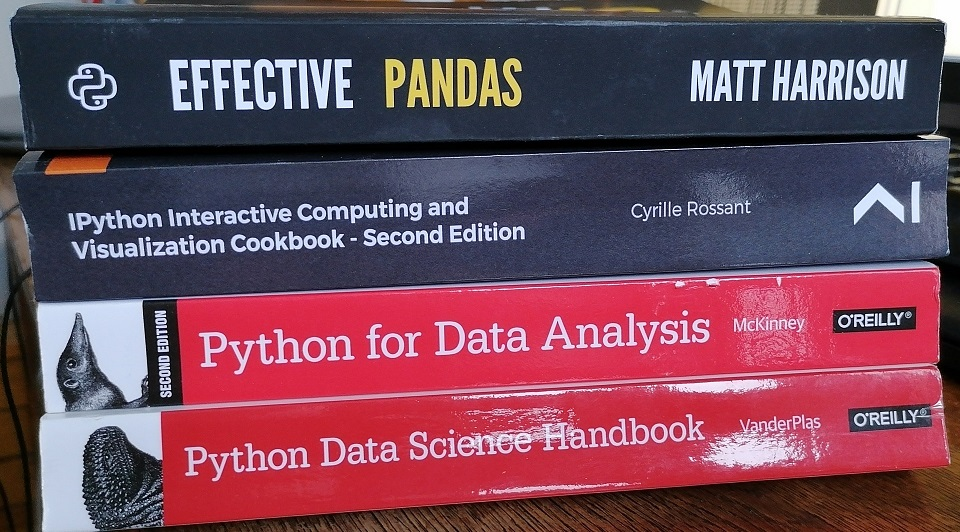

In [1]:
# load image from pandas books
from IPython.display import Image

Image("images/pandas_books.jpg", width=480, height=266)

**Données de Stack Overflow**

**pandas** est sans doute la librairie Python la plus mentionnée dans *Stack Overflow* sur la période 2018-2021.

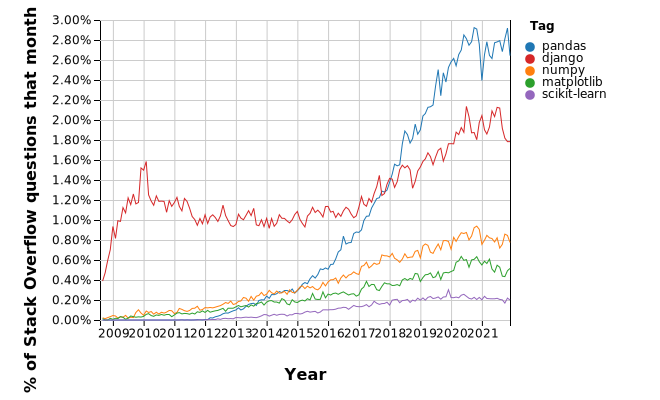

In [2]:
# load image from Stack Overflow
from IPython.display import SVG

SVG("images/stackoverflow.svg")

Sources :
- *pandas: powerful Python data analysis toolkit*, github, 2022, https://github.com/pandas-dev/pandas
- Kevin Markham, *What's the future of the pandas library?*, 2018, https://www.dataschool.io/future-of-pandas/

**Méthodologie CRISP-DM**

**CR**oss-**I**ndustry **S**tandard **P**rocess for **D**ata **M**ining

Etablie par la société SPSS (Statistical Package for the Social Sciences) en 2000 qui a été rachetée par IBM en 2009.

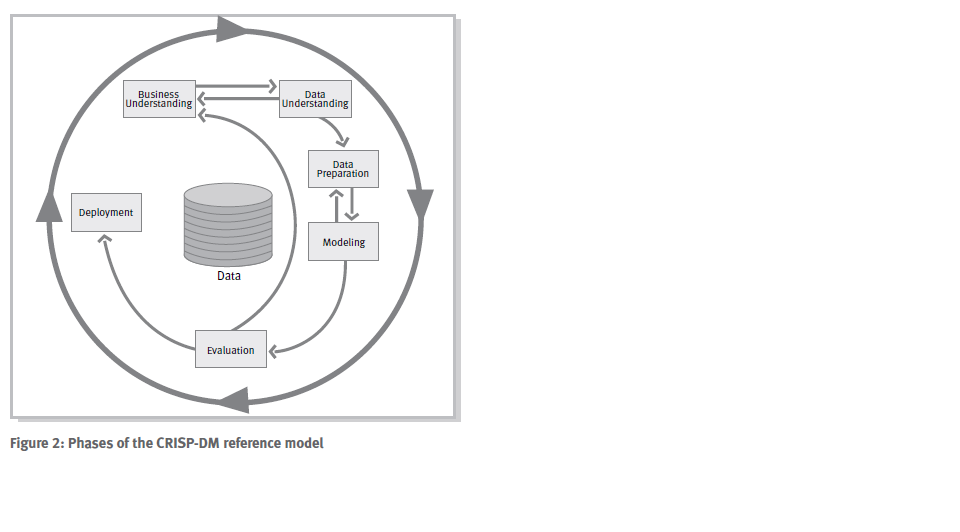

In [3]:
# load CRISP-DM
Image("images/schema-crisp-dm.png", width=960, height=532)

La librairie **pandas** peut être notamment mise en oeuvre dans les processus : *Data Understanding*, *Data Preparation* et aussi *Modeling* (directement et indirectement via **matplotlib**, **scikit-learn** et autres).

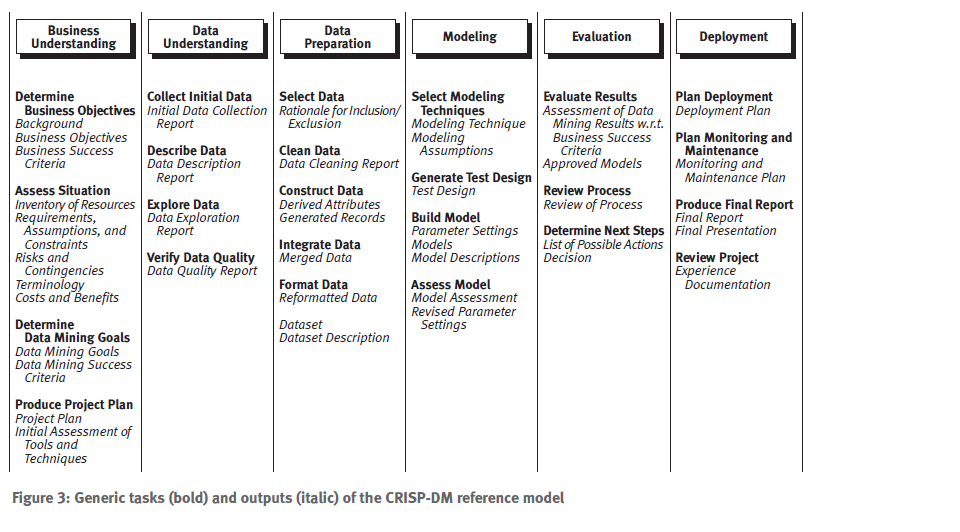

In [4]:
# load CRISP-DM
Image("images/process-crisp-dm.png", width=960, height=532)

Source :
- *CRISP-DM 1.0 - Step-by-step data mining guide*, 2000, https://www.the-modeling-agency.com/crisp-dm.pdf

**ADN de la librarie**

Pour mémoire, le nom **PANDAS** vient de l'acronyme **PAN**el (3D) + **DA**taframe (2D) + **S**eries (1D). La classe *Panel* a disparu (dépréciée en 2017 et supprimée en 2019), mais le nom de la librairie a été conservé !

Il s'avère que la librairie évolue en permanence (ajouts, modifications, dépréciations) :

version | date
-|-
 0.25 | octobre 2019
1.0.0 | janvier 2020
1.1.0 | juillet 2020
1.2.0 | décembre 2020
1.3.0 | juillet 2021
1.4.0 | juillet 2022

Les conséquences sont :
- Obsolescence rapide des connaissances du data scientist
- Nécessité de gérer un environnement virtuel par projet


## 2. Programmation avec pandas

Avec **pandas**, on est souvent amené à effectuer des séquences d'opérations sur des objets de type *Series* ou *DataFrame*.

Il existe plusieurs styles de programmation. Le style en vogue depuis quelques années est *Method chaining*.

### 2.1 Inplace parameter

Dans ce style de programmation, on modifie l'objet sur place à chaque étape.

```python
df.method1(inplace=True)
df.method2(inplace=True)
df.method3(inplace=True)
```

> <span style="background-color:yellow">The pandas core team discourages the use of the inplace parameter.</span>

En fait, l'utilisation de l'option `inplace=True` ne garantit pas l'absence de copie en mémoire. C'est dû à la gestion de la mémoire par le *BlockManager* qui éclate les données d'un *DataFrame* en autant de *ndarrays* par type de données (int, float, object...).

Source :
- Uwe Korn, *The one pandas internal I teach all my new colleagues: the BlockManager*, 2020 https://uwekorn.com/2020/05/24/the-one-pandas-internal.html

### 2.2 Variable assignment

Dans ce style de programmation, on affecte à une variable le résultat de chaque opération. Ce style peut conduire à la création de nombreuses variables intermédiaires qui sont peu utilisées.

```python
df = df.method1()
df = df.method2()
df = df.method3()
```

### 2.3 Method chaining

Dans ce style de programmation, on enchaîne systématiquement les opérations au fur et à mesure sur l'objet qui résulte de l'opération précédente. L'ensemble des enchaînements est encapsulé entre parenthèses pour des raisons syntaxiques.

```python
(df.method1()
 .method2()
 .method3()
)
```

<span style="background-color:yellow">The pandas core team now encourages the use of "method chaining"</span>. This is a style of programming in which you chain together multiple method calls into a single statement. This allows you to pass intermediate results from one method to the next rather than storing the intermediate results using variables.

Sources:

- Matt Harrison, *Effective Pandas*, 2021, https://store.metasnake.com/effective-pandas-book

- Bindi Chen, *Using Pandas Method Chaining to improve code readability - A tutorial for the best practice with Pandas Method Chaining*,  2020 https://towardsdatascience.com/using-pandas-method-chaining-to-improve-code-readability-d8517c5626ac

- Adiamaan Keerthi, *The Unreasonable Effectiveness of Method Chaining in Pandas*, 2019, https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69

- Kevin Markham, *What's the future of the pandas library?*, 2018, https://www.dataschool.io/future-of-pandas/

- Marc Garcia, *Towards Pandas 1.0*, PyData London Meetup #47, August 2018 https://www.youtube.com/watch?v=hK6o_TDXXN8

Il existe des méthodes spéciales qui facilitent ou permettent le chaînage des instructions avec **pandas** en utilisant essentiellement une **notation fonctionnelle** :

- **En particulier**
    - `s.loc[lambda s_: ...]` ou `df.loc[lambda df_: ...]` : sélections fonctionnelles sur les objets de type *Series* ou *DataFrame* sans avoir à désigner explicitement les objets sur lesquels portent les sélections,
    - `df.assign(col=lambda df_: ...)`  ou `assign({col=lambda df_: ...})`: utilisation de mot-clés, ou d'un dictionnaire, généralisant l'usage d'une notation fonctionnelle pour modifier ou ajouter des colonnes à un *DataFrame*,
    - `s.pipe(func, *args, **kwargs)` ou `df.pipe(func, *args, **kwargs)`: application d'une fonction prenant en premier argument un objet de type *Series* ou *DataFrame*,


- **Egalement**
    - `eq()`, `ne()`, `gt()`, `ge()`, `lt()`, `le()`... : pour toutes les comparaisons binaires sur les objets de type *Series* ou *DataFrame*,
    - `add()`, `sub()`, `mul()`, `div()`, `mod()`, `pow()`... : pour toutes les opérations binaires sur les objets de type *Series* ou *DataFrame*,
    - `where(cond, other)` (resp. `mask(cond, other)`) : remplace les valeurs d'un objet de type *Series* ou *DataFrame* si la condition est fausse (resp. vraie).
    - `transform(func, *args, **kwargs)` : modification d'un objet de type *Series* ou *DataFrame* par application d'une fonction s'appliquant à chacune de ses valeurs,
    - etc.

**Remarque** : Pour les *DataFrames*, il est toujours possible d'avoir des noms de colonnes quelconques, mais la notation pousse un peu à utiliser des noms de colonnes utilisables comme attributs. Exemple : `df.col` au lieu de `df["col"]`.

### 2.4 Un premier exemple

On utilise les données de l'Insee sur les prénoms : https://www.insee.fr/fr/statistiques/2540004?sommaire=4767262

> Le fichier des prénoms contient des données sur les prénoms attribués aux enfants nés en France entre 1900 et 2020.

In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# display options
pd.set_option("display.min_rows", 16)
pd.set_option("display.max_columns", 36)

On charge les données et on les prépare en *variable assignment* (qu'on passera en *method chaining* un peu plus loin). On obtient un *DataFrame* avec le nombre de naissances en France par année depuis 1900, par genre et par prénom.

In [6]:
# load and process nat2020_csv.zip
df_names = pd.read_csv('data/nat2020_csv.zip',
                  sep=';',
                  header=0,
                  names=['gender', 'name', 'year', 'births'],
                  na_values={"name":"_PRENOMS_RARES", "year":"XXXX"},
                  keep_default_na=False)

# prep names with variable assignment
def prep_names0(df):
    df = df.copy()
    df = df.dropna()
    df = df.loc[df["name"].str.len() > 1]
    df["gender"] = df["gender"].map({1:"M", 2:"F"})
    df["name"] = df["name"].str.title()
    df = df.astype({'gender':'category', 'year':'uint16', 'births':'uint16'})
    df = df[["year", "name", "gender", "births"]]
    df = df.sort_values(["year", "gender", "births", "name"], ascending=[True, True, False, True])
    df = df.reset_index(drop=True)
    return df

df_names0 = prep_names0(df_names)
df_names0

,year,name,gender,births
0,1900,Marie,F,48713
1,1900,Jeanne,F,13981
2,1900,Marguerite,F,8058
3,1900,Germaine,F,6981
4,1900,Louise,F,6696
5,1900,Yvonne,F,5096
6,1900,Madeleine,F,4959
7,1900,Suzanne,F,4954
...,...,...,...,...
630399,2020,Zeïd,M,3


**Exemple résolu**
- Graphique avec l'évolution dans le temps de la diversité des prénoms qui se terminent par une lettre donnée, et ce, pour les 7 lettres qui présentent le plus de diversité la dernière année.

**En variable assignment**

En *variable assignment*, on utilise des variables intermédiaires qui sont utilisées peu de fois et qui encombrent la mémoire de Python (*private heap*), et aussi celle du data scientist !

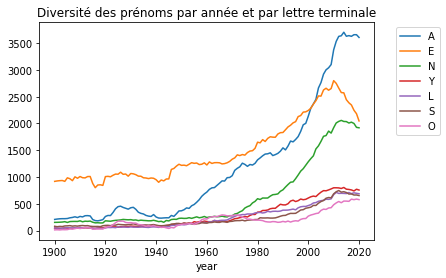

In [7]:
# variable assignment
df_names1 = df_names0.copy()
df_names1['terminal'] = df_names1['name'].str[-1].str.upper()  # plus efficace apply(lambda x: x[-1].upper())
tab = df_names1.pivot_table(values='name',
                            index='year',
                            columns='terminal',
                            aggfunc='count',
                            fill_value=0)
cols = tab.iloc[-1].nlargest(7).index
ax = tab[cols].plot.line(title='Diversité des prénoms par année et par lettre terminale')
ax.legend(bbox_to_anchor=(1.05, 1.0));

**En method chaining**

Aucune variable intermédiaire n'est utilisée.

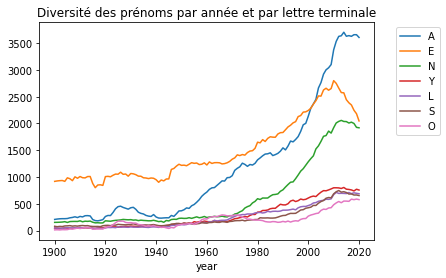

In [8]:
# method chaining
(df_names0.assign(terminal=lambda df_: df_.name.str[-1].str.upper())  # plus efficace apply(lambda x: x[-1].upper())
 .pivot_table(values='name',
              index='year',
              columns='terminal',
              aggfunc='count',
              fill_value=0)
 .pipe(lambda df_: df_[df_.iloc[-1].nlargest(7).index])
 # plot
 .plot.line(title='Diversité des prénoms par année et par lettre terminale')
 .legend(bbox_to_anchor=(1.05, 1.0))
);

**Remarque** : En *method chaining*, on peut facilement afficher et comprendre les calculs intermédiaires en commentant et en décommentant les instructions (et en suprimant le caractère ";" à la fin).

**Exemple**

- Implémenter une fonction en *method chaining* qui produit un graphique avec l'évolution du nombre de naissances d'un prénom et d'un genre au fil des ans.

In [9]:
# %load exemples/01_plot_name_gender.py
# Graphique avec le nombre de naissances d'un prénom et d'un genre
def plot_name_gender(df, name, gender):
    """Plot births by year for a given name and gender"""
    return (df.loc[lambda df_: (df_.name==name) & (df_.gender==gender)]
            .plot.line(x="year", y="births", title=f"Nombre de naissances de {name} ({gender})")
            )


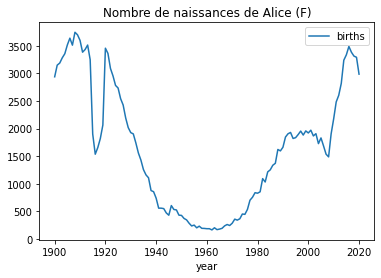

In [10]:
# plot_name_gender
plot_name_gender(df_names1, "Alice", "F");

**Exemple**
- Passer la fonction `prep_names0` en *method chaining*

```python
# prep names with variable assignment
def prep_names0(df):
    df = df.copy()
    df = df.dropna()
    df = df.loc[df["name"].str.len() > 1]
    df["gender"] = df["gender"].map({1:"M", 2:"F"})
    df["name"] = df["name"].str.title()
    df = df.astype({'gender':'category', 'year':'uint16', 'births':'uint16'})
    df = df[["year", "name", "gender", "births"]]
    df = df.sort_values(["year", "gender", "births", "name"], ascending=[True, True, False, True])
    df = df.reset_index(drop=True)
    return df
```

In [11]:
# %load exemples/02_prep_names
# method chaining
def prep_names(df):
    return (df.dropna()
            .loc[lambda df_: df_.name.str.len() > 1]
            .assign(gender=lambda df_: df_.gender.map({1:"M", 2:"F"}),
                    name=lambda df_: df_.name.str.title())
            .astype({'gender':'category', 'year':'uint16', 'births':'uint16'})
            .loc[:, ["year", "name", "gender", "births"]]
            .sort_values(["year", "gender", "births", "name"], ascending=[True, True, False, True])
            .reset_index(drop=True)
    )


In [12]:
# prep_names
df_names1 = prep_names(df_names)
df_names1

,year,name,gender,births
0,1900,Marie,F,48713
1,1900,Jeanne,F,13981
2,1900,Marguerite,F,8058
3,1900,Germaine,F,6981
4,1900,Louise,F,6696
5,1900,Yvonne,F,5096
6,1900,Madeleine,F,4959
7,1900,Suzanne,F,4954
...,...,...,...,...
630399,2020,Zeïd,M,3


**Exemple**
- On a implémenté une fonction qui affiche l'évolution au fil des ans du genre d'un prénom
- Passer la fonction `plot_gender_evolution0` en *method chaining*

```python
# évolution du genre d'un prénom
def plot_gender_evolution0(df, name):
    selection = df.loc[df['name']==name]
    ratio = df.pivot_table(values="births",
                           index="year",
                           columns="gender",
                           aggfunc="sum",
                           fill_value=0)
    evolution = ratio.div(ratio.sum(axis=1), axis=0)
    evolution.plot.line(title=f'Evolution du genre de {name} au fil des ans')
```

- La tester avec différents prénoms :  *Alix*, *Camille*, *Dominique*, *Charlie*, *Noa*, *Claude*, *Kim*, *Jo*, *George*, ...

In [13]:
# %load exemples/03_plot_gender_evolution
# gender evolution graph for a name
def plot_gender_evolution(df, name):
    """Plot the gender evolution of a given name"""
    return (df.loc[df.name==name]
            .pivot_table(values="births",
                         index="year",
                         columns="gender",
                         aggfunc="sum",
                         fill_value=0)
            .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
            .plot.line(title=f'Evolution du genre de {name} au fil des ans')
            .legend(bbox_to_anchor=(1.2, 1.0))
    )

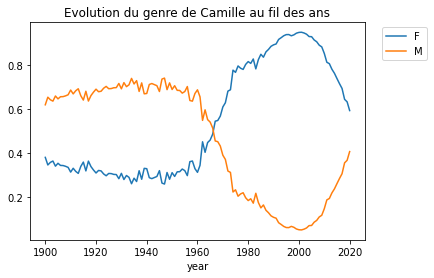

In [14]:
plot_gender_evolution(df_names1, "Camille");

**Autres exemples (merci à Julien &#9786;)**

- Implémenter une fonction qui sélectionne les N prénoms les plus donnés pendant une décennie.
- Implémenter une fonction qui produit un graphique avec l'évolution au fil des ans des naissances des N prénoms les plus donnés pendant une décennie. La tester avec différentes périodes.

In [15]:
# %load exemples/04_top_names_decade.py
# Top N prénoms de la décennie
def topn_names_decade(df, year, n=5):
    """Return list of top 7 names given in a decade"""
    return (df.loc[df.year.isin(range(year, year+10))]
            .groupby("name")["births"]
            .sum()
            .nlargest(n)
            .index
           )


In [16]:
topn_names_decade(df_names1, 1900)

Index(['Marie', 'Jean', 'Jeanne', 'Louis', 'Pierre'], dtype='object', name='name')

In [17]:
# %load exemples/05_plot_topn_names_decade.py
# Top N prénoms de la décennie
def plot_topn_names_decade(df, year, n=5):
    """Plot births by year for the top n names given in a decade"""

    fig, ax = plt.subplots(figsize=(10, 6))

    return (df.loc[df.name.isin(topn_names_decade(df, year, n))]
            .pivot_table(index="year",
                         columns="name",
                         values="births",
                         fill_value=0)
            # plot
            .plot.line(title=f"Top {n} prénoms de la décennie {year}-{year+9}", ax=ax)
            .legend(bbox_to_anchor=(1.15, 1.0))
           )


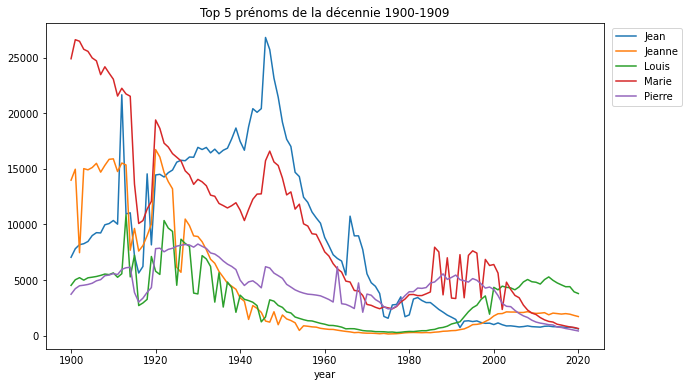

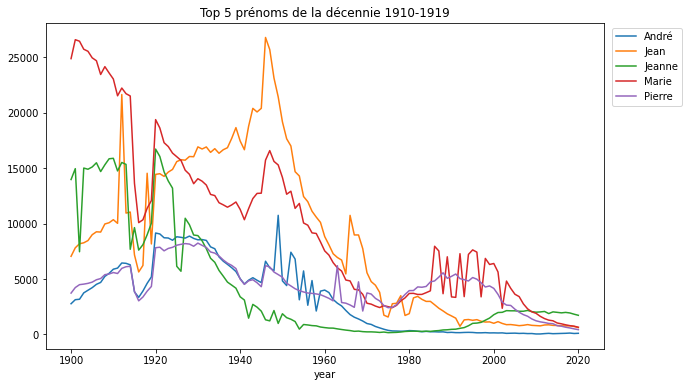

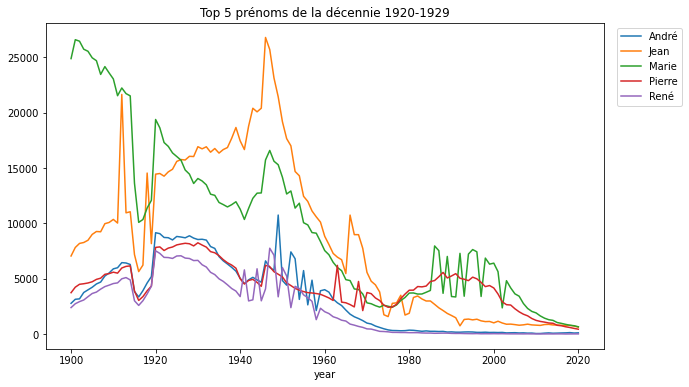

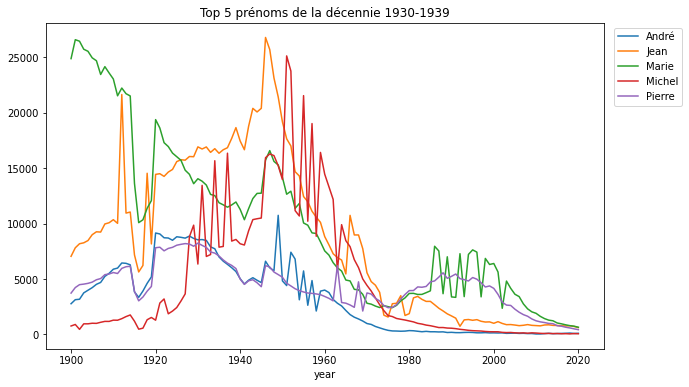

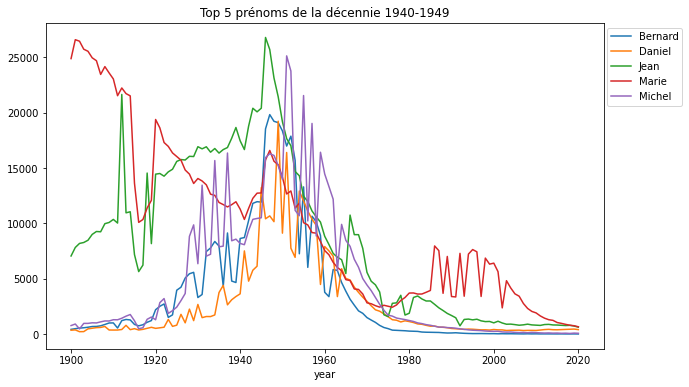

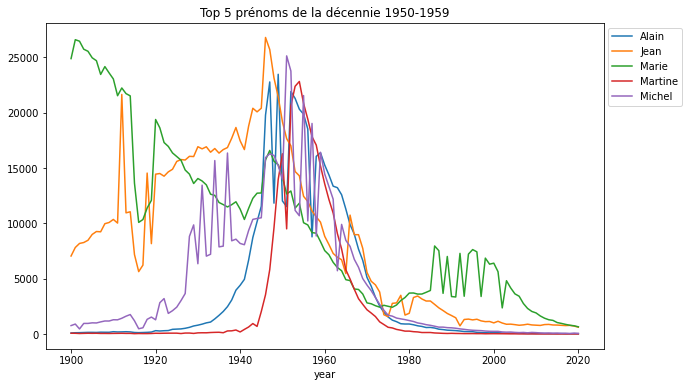

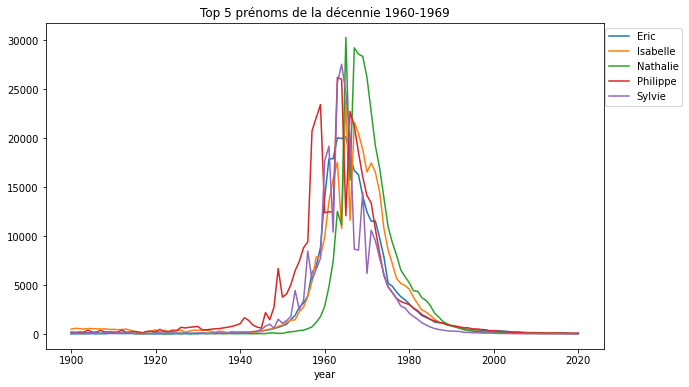

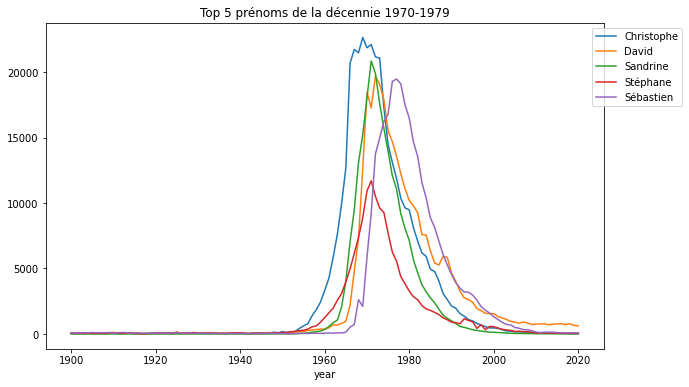

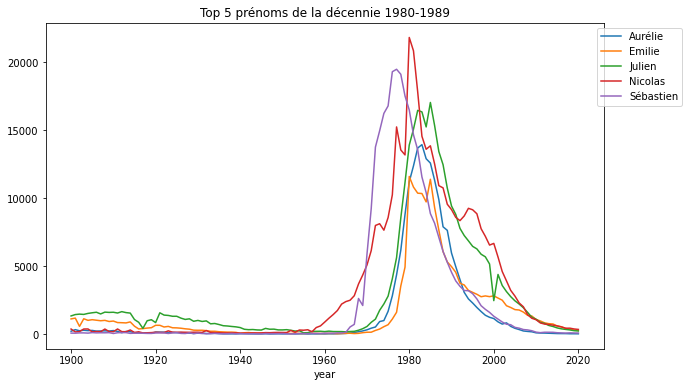

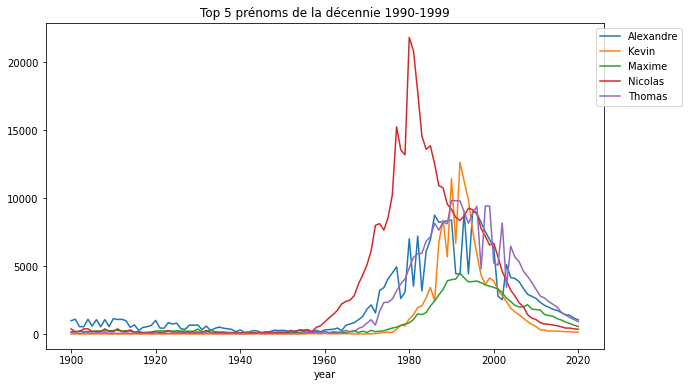

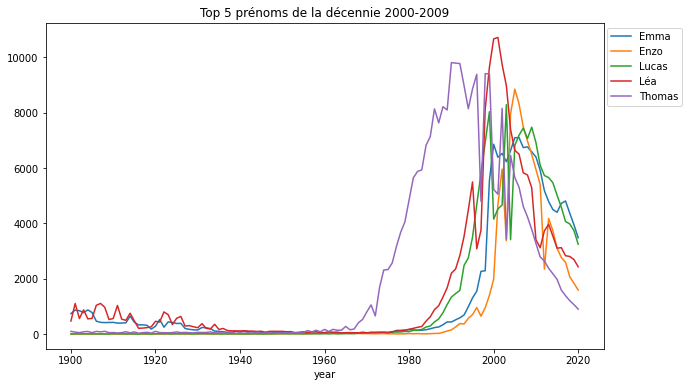

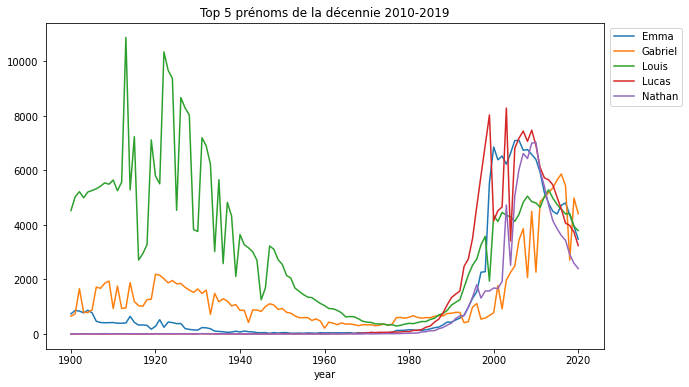

In [18]:
# decade by decade
for year in range(1900, 2020, 10):
    plot_topn_names_decade(df_names1, year)

## 3. Chargement des données

Il existe de nombreuses fonctions de chargement des données selon le format d'origine, y compris des formats de logiciels propriétaires ; ce qui a certainement contribué au succès de la librairie.

Source : https://pandas.pydata.org/docs/user_guide/io.html

Dans le cadre de cet atelier, seule la fonction `read_csv()` sera abordée.

### 3.1 Interprétation automatique des valeurs manquantes

Par défaut, **pandas** interprète automatiquement certaines chaînes de catactères comme étant des valeurs manquantes. 

In [19]:
# default NaN values
print(pd._libs.parsers.STR_NA_VALUES)

{'NA', '', 'n/a', 'NULL', '1.#IND', 'nan', '1.#QNAN', 'null', 'NaN', '-NaN', '#N/A N/A', '-1.#QNAN', '#NA', '<NA>', '-nan', '-1.#IND', '#N/A', 'N/A'}


**Remarque** : &#9888; L'interprétation automatique de certaines valeurs peut gêner voir fausser la phase de *Data Understanding*. On va en voir quelques exemples.

**Exemple**

On charge le dataset des prénoms français avec les valeurs manquantes par défaut.

In [20]:
# load with default missing values
df_names1 = pd.read_csv('data/nat2020_csv.zip',
                         sep=';')
na1 = df_names1.isna().sum()
na1

sexe        0
preusuel    2
annais      0
nombre      0
dtype: int64

On charge le même dataset avec le type `str` et en neutralisant les valeurs manquantes par défaut (chaîne vide uniquement).

In [21]:
# load without missing values except ""
df_names0 = pd.read_csv('data/nat2020_csv.zip',
                  sep=';',
                  dtype=str,
                  na_values="",
                  keep_default_na=False)
na0 = df_names0.isna().sum()
na0

sexe        0
preusuel    0
annais      0
nombre      0
dtype: int64

Calcul des écarts entre les nombres de valeurs manquantes.

In [22]:
# differences of missing values
na1 - na0

sexe        0
preusuel    2
annais      0
nombre      0
dtype: int64

Quels noms sont considérés comme des valeurs manquantes ?

In [23]:
# which names are interpretted as NaN
((df_names0["preusuel"].value_counts() - df_names1["preusuel"].value_counts())
 .loc[lambda s_: s_ != 0]
 .index
 .tolist()
)

['NA']

Dans ce dataset, *NA* est un prénom d'origine chinoise.

**Exemples**

- On considère le dataset "cities500.zip" : villes mondiales fournies par le site https://www.geonames.org/
- Charger ce dataset sans interprétation des valeurs manquantes (à l'exception de la chaîne vide "").
- Calculer les écarts des nombres de valeurs manquantes entre les 2 *DataFrames*.
- Quels sont les "country_code" et les "admin2_code" qui sont interprétés comme des valeurs manquantes.
- Pour les "admin2_code" interprétés comme des valeurs manquantes, quels sont les "country_code" des pays concernés ?

In [24]:
# load with default missing values
df_cities1 = pd.read_csv('data/cities500.zip',
                         sep='\t',
                         header=None,
                         dtype=str,
                         names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation', 'dem', 'timezone', 'modification_date'])
df_cities1.shape

(197249, 19)

In [25]:
# %load exemples/06_missing_values.py
# load with default missing

na1 = df_cities1.isna().sum()

# load without missing values except ""
df_cities0 = pd.read_csv("data/cities500.zip",
                         sep="\t",
                         header=None,
                         dtype=str,
                         na_values="",
                         keep_default_na=False,
                         names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation', 'dem', 'timezone', 'modification_date'])

na0 = df_cities0.isna().sum()

# gap
print(na1 - na0)

# which country codes are interpretted as NaN
na = ((df_cities0["country_code"].value_counts() - df_cities1["country_code"].value_counts())
      .loc[lambda s_: s_ != 0]
      .index
      .tolist()
     )
print(na)

# which admin2 codes are interpretted as NaN
na = ((df_cities0["admin2_code"].value_counts() - df_cities1["admin2_code"].value_counts())
      .loc[lambda s_: s_ != 0]
      .index
      .tolist()
     )
print(na)

# countries with an admin2 code = NA
print(df_cities0.loc[lambda df_: df_["admin2_code"] == "NA", "country_code"]
      .value_counts())


geonameid              0
name                   0
asciiname              0
alternatenames         0
latitude               0
longitude              0
feature_class          0
feature_code           0
country_code          45
cc2                    0
admin1_code            0
admin2_code          373
admin3_code            0
admin4_code            0
population             0
elevation              0
dem                    0
timezone               0
modification_date      0
dtype: int64
['NA']
['NA']
ES    208
IT    164
FM      1
Name: country_code, dtype: int64


**Conclusion** : En phase de découverte d'un dataset, pour éviter des interprétations erronées, il vaut mieux utiliser de prime abord les trois options :
```python
dtype=str,
na_values="",
keep_default_na=False,
```

**Remarque** : Il est possible d'utiliser `functools.partial` pour définir une fonction de chargement des données brutes à partir de la fonction `pandas.read_csv` en fixant certains arguments.

In [26]:
# use functools.partial
from functools import partial

load_raw_csv = partial(pd.read_csv, dtype=str, na_values="", keep_default_na=False)

In [27]:
# usage of load_raw_csv
(load_raw_csv("data/nat2020_csv.zip", sep=";")
 .isna()
 .sum()
)

sexe        0
preusuel    0
annais      0
nombre      0
dtype: int64

### 3.2 Visualisation des valeurs manquantes en utilisant la stylisation des *DataFrames*

Un *DataFrame* est doté d'un objet *Styler* accessible par l'opérateur `style` qui permet de styliser l'affichage dans un notebook à l'aide de différentes méthodes :
- `format({"col":"{:}")` : formatte les valeurs des cellules,
- `bar(color="", subset=cols)` : produit un graphique à barres en fonction de la valeur des cellules numériques indiquées (par ex. "lightgreen")
- `background_gradient(cmap="", subset=cols)` : utilise une colormap en fonction de la valeur des cellules numériques indiquées (par ex. "RdYlGn")
- `applymap(func, subset=cols)` : applique une fonction de mise en forme aux cellules en fonction de leur valeur
- `pipe(func, *args, **kwargs)` : applique une fonction à l'objet *Styler*.
- etc.

Couleurs disponibles :
- List of named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
- Choosing Colormaps in Matplotlib: https://matplotlib.org/stable/tutorials/colors/colormaps.html

**Exemples** :
- On charge le fichier "List0F.zip". Il s'agit d'un fichier avec les organismes de formation. On va juste s'intéresser au taux de remplissage des différentes colonnes.
- A partir du nombre de valeurs non nulles des colonnes, styliser un *DataFrame* avec une barre de couleur.
- A partir du pourcentage de remplissage des colonnes arrondi à un chiffre, styliser un *DataFrame* avec une colormap.

In [28]:
# load ListeOF
df_of = load_raw_csv("data/ListeOF.zip")
df_of.head()

,numero_de_da,form_total,da_siren,da_no_etab,da_raison_sociale,sf1,nsf1,nhsf1,sf2,nsf2,nhsf2,sf3,nsf3,nhsf3,sf4,nsf4,nhsf4,sf5,...,nhsf12,sf13,nsf13,nhsf13,sf14,nsf14,nhsf14,sf15,nsf15,nhsf15,adr_rue_physique,adr_rue_complement_physique,adr_code_postal_physique,adr_ville_physique,adr_rue_postale,adr_rue_complement_postale,adr_code_postal_postale,adr_ville_postale
0,11940611494,NaN,430451229,00016,E DAY SARL,326,55,2970,326,80,8000,326,21,226,326,1,30,326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 BIS IMPASSE DU SUD,NaN,94120,FONTENAY SOUS BOIS,1 BIS IMPASSE DU SUD,NaN,94120,FONTENAY SOUS BOIS
1,11754589675,NaN,522004860,00014,WITEK MEDIA,100,5,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 RUE CHARDIN,NaN,75016,PARIS,3 RUE CHARDIN,NaN,75016,PARIS
2,11753671675,NaN,438147845,00012,COLLECTIF D'INGENIERIE DE DEVELOPPEMENT,100,53,390,330,45,330,330,159,1460,330,198,1980,330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262 AV DAUMESNIL,NaN,75012,PARIS,17 RUE RUBENS,NaN,75012,PARIS
3,11788081478,1,504323395,00013,DOMINIQUE PROUST MONSAINGEON,124,80,1400,124,40,700,124,192,6888,315,70,490,331,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6 GRANDE RUE,NaN,78290,CROISSY SUR SEINE,6 GRANDE RUE,NaN,78290,CROISSY SUR SEINE
4,11754129275,NaN,393702956,00029,ASSO RESEAU CURIE,110,172,1204,110,180,1260,110,102,1515,110,71,574,110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103 BD ST MICHEL,NaN,75005,PARIS,103 BD ST MICHEL,NaN,75005,PARIS


In [29]:
# %load exemples/07_style_bar.py

# bar
(df_of.notna()
 .sum()
 .to_frame()
 .rename({0: "completion"}, axis=1)
 .style.bar(color='lightgreen')
)


,completion
numero_de_da,86948
form_total,71492
da_siren,86948
da_no_etab,80379
da_raison_sociale,86948
sf1,74274
nsf1,74264
nhsf1,74264
sf2,66285
nsf2,66279


In [30]:
# %load exemples/08_style_cmap.py
# cmap
(df_of.notna()
 .sum()
 .mul(100/len(df_of))
 .to_frame()
 .rename({0: "completion"}, axis=1)
 .style.background_gradient(cmap="RdYlGn")
 .format("{:.1f}%")
)


,completion
numero_de_da,100.0%
form_total,82.2%
da_siren,100.0%
da_no_etab,92.4%
da_raison_sociale,100.0%
sf1,85.4%
nsf1,85.4%
nhsf1,85.4%
sf2,76.2%
nsf2,76.2%


### 3.3 Optimisation des types numériques et catégoriels

La librairie **pandas** n'optimise pas les types des colonnes chargées. Les types par défaut sont : *int64*, *float64* et *object* pour les chaînes de caractères.

**Chargement brut**

In [31]:
# load cities500
df_cities0 = pd.read_csv('data/cities500.zip',
                   sep='\t',
                   header=None,
                   names=['geonameid', 'name', 'asciiname', 'alternatenames', 'latitude', 'longitude', 'feature_class', 'feature_code', 'country_code', 'cc2', 'admin1_code', 'admin2_code', 'admin3_code', 'admin4_code', 'population', 'elevation', 'dem', 'timezone', 'modification_date'],
                   dtype={'admin1_code': str, 'admin2_code': str, 'admin3_code': str, 'admin4_code': str},
                   na_values=['', -9999],
                   keep_default_na=False)

df_cities0.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197249 entries, 0 to 197248
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   geonameid          197249 non-null  int64  
 1   name               197249 non-null  object 
 2   asciiname          197232 non-null  object 
 3   alternatenames     161994 non-null  object 
 4   latitude           197249 non-null  float64
 5   longitude          197249 non-null  float64
 6   feature_class      197249 non-null  object 
 7   feature_code       197248 non-null  object 
 8   country_code       197249 non-null  object 
 9   cc2                6367 non-null    object 
 10  admin1_code        197219 non-null  object 
 11  admin2_code        166739 non-null  object 
 12  admin3_code        89964 non-null   object 
 13  admin4_code        32506 non-null   object 
 14  population         197249 non-null  int64  
 15  elevation          33443 non-null   float64
 16  de

In [32]:
# memory_usage
df_cities0.memory_usage(deep=True)

Index                     128
geonameid             1577992
name                 14205914
asciiname            13188826
alternatenames       28269044
latitude              1577992
longitude             1577992
feature_class        11440442
feature_code         11996215
country_code         11637691
cc2                   6483887
admin1_code          11652610
admin2_code          11028259
admin3_code           9013299
admin4_code           7327272
population            1577992
elevation             1577992
dem                   1577992
timezone             14013625
modification_date    13215683
dtype: int64

**Optimisation des différents types**

On implémente une fonction qui fournit un type minimaliste pour chaque colonne.

Evidemment encore faut-il que les valeurs des colonnes ne soient pas ensuite amenées à évoluer et à dépasser les limites des différents types.

In [33]:
# exemple de dépassement de limite
print([i**3 for i in range(10)])

# uint8 : 0-255
(pd.Series(range(10), dtype='uint8')
.pow(3)
)

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729]


0      0
1      1
2      8
3     27
4     64
5    125
6    216
7     87
8      0
9    217
dtype: uint8

In [34]:
# optimized types
def optimized_types(df, n_cats=255):
    """Return a dict with optimized dtypes for a given DataFrame"""
    
    types = {}
    
    # int
    for col in df.select_dtypes(include=['int64']).columns:
        
        s = df[col]
        
        # unsigned int
        if (s >= 0).all():
            for subtype in ['uint8', 'uint16', 'uint32']:  # 'uint64' useless
                if (s <= np.iinfo(subtype).max).all():
                    types[col] = subtype
                    break
                    
        # signed int
        else:
            for subtype in ['int8', 'int16', 'int32']:
                if ((s >= np.iinfo(subtype).min) & (s <= np.iinfo(subtype).max)).all():
                    types[col] = subtype
                    break
                    
    # float
    for col in df.select_dtypes(include=['float64']).columns:
        
        s = df[col].dropna()
        
        for subtype in ['float16', 'float32']:
            if ((s >= np.finfo(subtype).min) & (s <= np.finfo(subtype).max)).all():
                types[col] = subtype
                break
                
    # category
    types.update({col:"category" for col in df.select_dtypes(include=['object']).columns
                   if df[col].nunique() <= n_cats})

    return types
            
optimized_types(df_cities0)

{'geonameid': 'uint32',
 'population': 'uint32',
 'latitude': 'float16',
 'longitude': 'float16',
 'elevation': 'float16',
 'dem': 'float16',
 'feature_class': 'category',
 'feature_code': 'category',
 'country_code': 'category',
 'cc2': 'category'}

In [35]:
# memory usage
df_cities1 = df_cities0.astype(optimized_types(df_cities0))
df_cities1.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197249 entries, 0 to 197248
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   geonameid          197249 non-null  uint32  
 1   name               197249 non-null  object  
 2   asciiname          197232 non-null  object  
 3   alternatenames     161994 non-null  object  
 4   latitude           197249 non-null  float16 
 5   longitude          197249 non-null  float16 
 6   feature_class      197249 non-null  category
 7   feature_code       197248 non-null  category
 8   country_code       197249 non-null  category
 9   cc2                6367 non-null    category
 10  admin1_code        197219 non-null  object  
 11  admin2_code        166739 non-null  object  
 12  admin3_code        89964 non-null   object  
 13  admin4_code        32506 non-null   object  
 14  population         197249 non-null  uint32  
 15  elevation          33443 non-null 

In [36]:
# memory_usage
df_cities1.memory_usage(deep=True)

Index                     128
geonameid              788996
name                 14690565
asciiname            13188826
alternatenames       28269044
latitude               394498
longitude              394498
feature_class          197415
feature_code           198908
country_code           417308
cc2                    207976
admin1_code          11652610
admin2_code          11028259
admin3_code           9013299
admin4_code           7327272
population             788996
elevation              394498
dem                    394498
timezone             14013625
modification_date    13215683
dtype: int64

**Efficacité de la sélection object vs category**

La sélection de données catégorielles est plus efficace que celle des chaînes de catactères.

In [37]:
# feature_code list
df_cities0["feature_code"].unique()

array(['PPL', 'PPLA', 'PPLC', 'PPLA2', 'PPLW', 'PPLA3', 'PPLX', 'PPLA4',
       'PPLL', 'PPLS', 'PPLQ', 'PPLF', 'PPLA5', 'PPLG', nan, 'PPLH',
       'PPLCH', 'PPLR', 'STLMT'], dtype=object)

In [38]:
# tests

def tests():
    """Test speed for different feature_code selection"""
    for code in ["PPL", "PPLA", "PPLC"]:  # cities, administrations level 1, capitals
        percent = len(df_cities1.loc[df_cities1["feature_code"]==code])/len(df_cities1)*100
        print(f"{code}: {percent:.1f}%")
        # loc + lambda
        %timeit df_cities0.loc[lambda df_: df_.feature_code==code]
        %timeit df_cities1.loc[lambda df_: df_.feature_code==code]
        print()
        
# tests()

## 4. Autres datasets

### 4.1 Taux de change + sparklines

Dataset des taux de change fourni par la Banque de France : http://webstat.banque-france.fr/fr/

**Chargement du dataset**

In [39]:
# load Webstat_Export.csv
df_change = pd.read_csv("data/Webstat_Export.csv",
                        sep=";",
                        na_values='-',
                        decimal=',',
                        skiprows=[1, 2])
df_change.shape

(8438, 108)

**Liste des colonnes**

In [40]:
# columns
df_change.columns.tolist()

['Titre :',
 'Taux de change effectif réel - 36 partenaires commerciaux, variation sur 3 ans',
 'Taux de change effectif réel - 16 partenaires commerciaux (zone euro)',
 'Dollar australien (AUD)',
 'Lev bulgare (BGN)',
 'Real brésilien (BRL)',
 'Dollar canadien (CAD)',
 'Franc suisse (CHF)',
 'Yuan renminbi chinois (CNY)',
 'Livre chypriote (CYP)',
 'Couronne tchèque (CZK)',
 'Couronne danoise (DKK)',
 'Couronne estonienne (EEK)',
 "Cours de l'or contre euro - 1er fixing à Londres",
 'Livre sterling (GBP)',
 'Dollar de Hong Kong (HKD)',
 'Kuna croate (HRK)',
 'Forint hongrois (HUF)',
 'Roupie indonésienne (IDR)',
 'Sheqel israélien (ILS)',
 'Roupie Indienne (100 paise)',
 'Couronne islandaise (ISK)',
 'Yen japonais (JPY)',
 'Won coréen (KRW)',
 'Litas lituanien (LTL)',
 'Lats letton (LVL)',
 'Livre maltaise (MTL)',
 'Peso méxicain (MXN)',
 'Ringgit malaisien (MYR)',
 'Couronne norvégienne (NOK)',
 'Dollar neo-zélandais (NZD)',
 'Peso philippin (PHP)',
 'Zloty polonais (PLN)',
 'Leu rou

Il est possible d'extraire certains codes ISO3 des devises à l'aide d'une expression régulière.

In [41]:
# extraction of currency ISO3
(pd.Series(df_change.columns.tolist())
.str.extract(r'\(([A-Z]{3})\)$', expand=False)
.unique()
)

array([nan, 'AUD', 'BGN', 'BRL', 'CAD', 'CHF', 'CNY', 'CYP', 'CZK', 'DKK',
       'EEK', 'GBP', 'HKD', 'HRK', 'HUF', 'IDR', 'ILS', 'ISK', 'JPY',
       'KRW', 'LTL', 'LVL', 'MTL', 'MXN', 'MYR', 'NOK', 'NZD', 'PHP',
       'PLN', 'RON', 'RUB', 'SEK', 'SGD', 'SIT', 'SKK', 'THB', 'TRY',
       'USD', 'ZAR'], dtype=object)

**Préparation du dataset**

On crée une fonction en *variable assignment* pour préparer le dataset et sélectionner quelques devises.

In [42]:
# prep currency data: variable assignment
def prep_change0(df, currencies):
    df_prep = df.copy()
    cols = pd.Series(df.columns.tolist()).str.extract('\(([A-Z]{3})\)$', expand=False)
    df_prep.columns = ["Date"] + list(cols[1:])
    df_prep["Date"] = pd.to_datetime(df_prep["Date"], format='%d/%m/%Y', errors='ignore')
    df_prep = df_prep.set_index("Date")
    df_prep = df_prep[currencies]
    df_prep = df_prep.dropna()
    df_prep = df_prep.sort_index()
    return df_prep

df_change0 = prep_change0(df_change, ["USD", "CHF", "GBP", "JPY", "RUB", "CNY"])
df_change0

,USD,CHF,GBP,JPY,RUB,CNY
Date,,,,,,
2000-01-13,1.0276,1.6111,0.62550,108.89,29.4837,8.5054
2000-01-14,1.0225,1.6130,0.62210,108.05,29.2350,8.4632
2000-01-17,1.0094,1.6136,0.61800,105.81,28.9738,8.3548
2000-01-18,1.0093,1.6131,0.61740,106.42,28.8510,8.3540
2000-01-19,1.0105,1.6120,0.61720,106.99,28.8815,8.3639
2000-01-20,1.0089,1.6147,0.61270,106.44,28.8048,8.3507
2000-01-21,1.0097,1.6102,0.61130,105.53,28.8342,8.3573
2000-01-24,1.0027,1.6136,0.60620,105.54,28.6018,8.2993
...,...,...,...,...,...,...


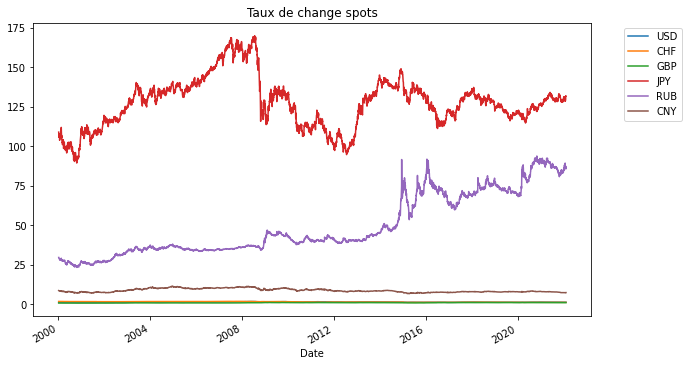

In [43]:
# Taux de change spots 
fig, ax = plt.subplots(figsize=(10,6))

(df_change0.plot.line(title="Taux de change spots", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);

#### Librairie sparklines

Une sparkline est une visualisation de données qui représente la forme générale de l'évolution d'une variable sur une ligne. La sparkline est en général insérée dans un texte et dans un tableau.

Source : 
- https://fr.wikipedia.org/wiki/Sparkline

In [44]:
# import
import sparklines

# example
print(sparklines.sparklines(pd.Series(range(8)))[0])

▁▂▃▄▅▆▇█


On affiche une sparkline donnant l'évolution trimestrielle du dollar en 2019.

In [45]:
# évolution trimestrielle du dollar en 2019
tab = (df_change0.loc["2019", "USD"]
                 .resample('Q')
                 .mean()
      )
tab

Date
2019-03-31    1.135771
2019-06-30    1.123700
2019-09-30    1.111942
2019-12-31    1.107106
Freq: Q-DEC, Name: USD, dtype: float64

In [46]:
# sparkline donnant l'évolution trimestrielle du dollar en 2019
print(sparklines.sparklines(tab)[0])

█▅▂▁


Il est possible de simplifier l'API de sparklines.

In [47]:
# sparkl
def sparkl(series):
    """Return a sparkline string for the given Series object"""
    return sparklines.sparklines(series)[0]

In [48]:
sparkl(tab)

'█▅▂▁'

**Exemples**
- Passer la fonction `prep_change0` en *method chaining*.
- Modifier le graphique en divisant les taux de change a) par leurs moyennes respectives b) par leurs dernières valeurs respectives.
- Vérifier que le graphique "fonctionne" lorsqu'on restreint la période temporelle considérée (par ex. `loc["2019":"2020"]`).
- Faire un graphique avec les taux de change divisés par leur moyennes respectives a) avec une moyenne mobile de 30 jours b) avec un maximum mobile de 100 jours.
- Produire un *DataFrame* avec les moyennes annuelles du cours du dollar (par exemple) arrondies à 3 décimales et des sparklines donnant les tendances trimestrielles.
- Rajouter un style pour que les moyennes annuelles apparaissent en vert si elles sont supérieures à 1.0 et en rouge sinon.
- Ecrire une fonction qui pour une année donnée produit un *DataFrame* avec les moyennes annuelles des cours des différentes devises et des sparklines donnant leurs tendances trimestrielles.

In [49]:
# %load exemples/09_prep_change
import re

def prep_change(df, currencies):

    def rename_column(col):
        if col == "Titre :":
            return "Date"
        else:
            m = re.search(r'\(([A-Z]{3})\)$', col)
            return m.group(1) if m else col

    return (df.rename(columns=lambda col: rename_column(col))
            .assign(Date=lambda df_: pd.to_datetime(df_["Date"], format='%d/%m/%Y', errors='ignore'))
            .set_index("Date")
            .loc[:, currencies]
            .dropna()
            .sort_index()
           )

df_change1 = prep_change(df_change, ["USD", "CHF", "GBP", "JPY", "RUB", "CNY"])


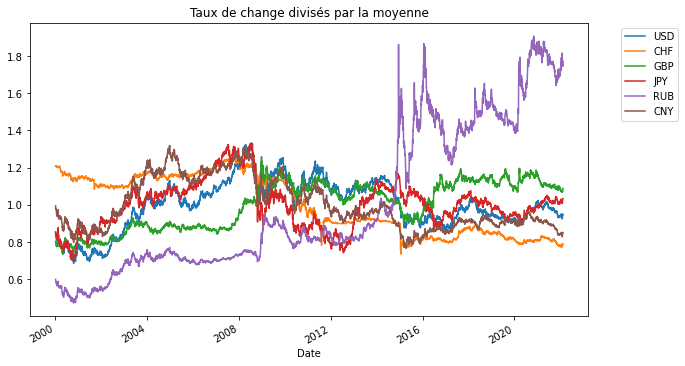

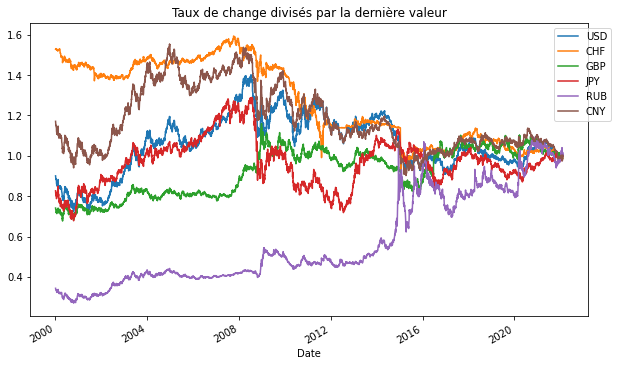

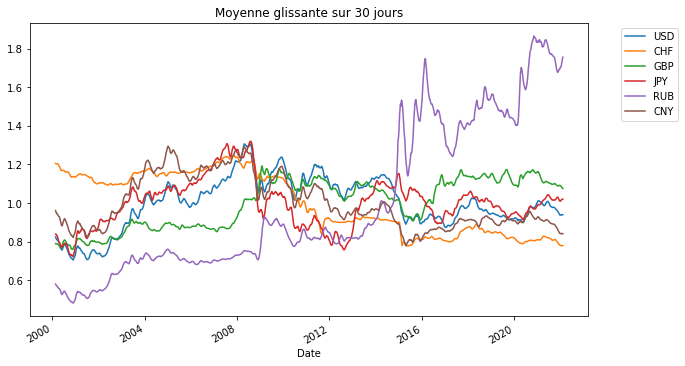

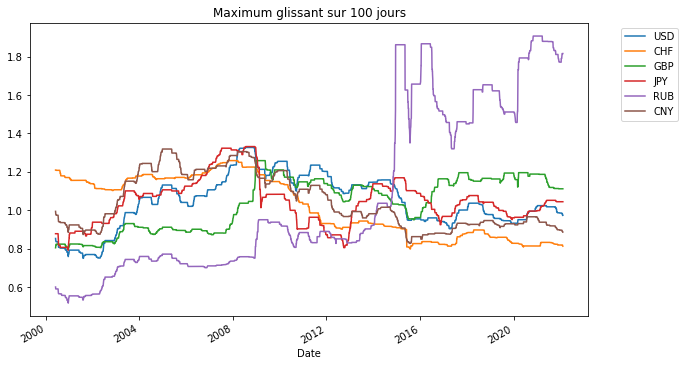

In [50]:
# %load exemples/10_plot_change.py
# Taux de change divisés par la moyenne
fig, ax = plt.subplots(figsize=(10,6))

(df_change1.pipe(lambda df_: df_.div(df_.mean()))
 .plot.line(title="Taux de change divisés par la moyenne", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);

# Taux de change divisés par la dernière valeur
fig, ax = plt.subplots(figsize=(10,6))

(df_change1.pipe(lambda df_: df_.div(df_.iloc[-1]))
 .plot.line(title="Taux de change divisés par la dernière valeur", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);
# Moyenne glissante sur 30 jours
fig, ax = plt.subplots(figsize=(10,6))

(df_change1.pipe(lambda df_: df_.div(df_.mean()))
 .rolling(30)
 .mean()
 .plot.line(title="Moyenne glissante sur 30 jours", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);

# Maximum glissant sur 100 jours
fig, ax = plt.subplots(figsize=(10,6))

(df_change1.pipe(lambda df_: df_.div(df_.mean()))
 .rolling(100)
 .max()
 .plot.line(title="Maximum glissant sur 100 jours", ax=ax)
 .legend(bbox_to_anchor=(1.05, 1.0))
);

# moyenne et tendance pour USD
(df_change1.groupby(pd.Grouper(freq='A'))
 .agg(USD=('USD', lambda s_: s_.mean().round(3)),
     trend_USD=('USD', lambda s_: sparkl(s_.resample('Q').mean())))
)

# moyenne et tendance pour toutes les devises
def mean_trend_year(year):
    return (df_change1.loc[str(year)]
           .pipe(lambda df_: pd.concat([df_.mean(), (df_.resample('Q')
                                                     .mean()
                                                     .apply(sparkl))],
                             axis=1))
           .rename({0: 'mean', 1:'trend'}, axis=1)
           )


### 4.2 Online Retail

Dataset *Online Retail* de Kaggle : https://www.kaggle.com/vijayuv/onlineretail

- Ela Kapoor, *Time series and feature engg analysis for retail*, (2021) https://www.kaggle.com/elakapoor/time-series-and-feature-engg-analysis-for-retail

**Exemples**
- Charger le dataset avec la fonction `load_raw_csv` et vérifier les valeurs manquantes.
- Ecrire une fonction de préparation du dataset :
    - suppression des lignes dupliquées
    - utiliser des types optimisés pour "Quantity" et "UnitPrice" (float32)
    - convertir "InvoiceDate" en date
- Faire un graphique à barres avec les volumes des transactions selon les heures
- Faire des graphiques à secteurs avec les volumes et les montants des transactions "UK" / "Non UK"
- Faire des graphiques à barres avec les volumes et les montants des transactions par pays "Non UK"
- Faire des graphiques à barres avec les volumes et les montants des transactions par type "Purchase" (Quantity &geq; 0) ou "Return" (Quantity &lt; 0)
- Produire un *DataFrame* avec les moyennes des montants des transactions par pays arrondies à 2 décimales triées par ordre décroissant et des sparklines donnant les tendances trimestrielles.

In [51]:
# load raw CSV
df_or = load_raw_csv("data/OnlineRetail.csv.zip", encoding='unicode_escape')
df_or.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [52]:
# %load exemples/11_prep_retail
df_or = load_raw_csv("data/OnlineRetail.csv.zip", encoding='unicode_escape')

def prep_retail(df):
    return (df.drop_duplicates()
            .astype({"Quantity":"float32", "UnitPrice":"float32"})
            .assign(InvoiceDate=lambda df_: pd.to_datetime(df_.InvoiceDate, format="%m/%d/%Y %H:%M"),
                    Hour=lambda df_: df_.InvoiceDate.dt.hour,
                    Amount=lambda df_: df_.Quantity * df_.UnitPrice,
                    Type=lambda df_: np.where(df_.Quantity >= 0, "Purchase", "Return"),
                    UK=lambda df_: df_.Country.where(df_.Country=="United Kingdom", "Non UK"))
            .set_index("InvoiceDate")
            .sort_index()
           )

df_or = prep_retail(df_or)
df_or.shape

(536641, 11)

,mean,trend
Country,,
Netherlands,121.000000,▅▄▁▇█
Australia,117.230003,▁▆▇▄█
Japan,116.559998,▄▁▅▃█
Singapore,95.849998,▁▅▂█
Sweden,85.260002,█▅▁▄▃
Hong Kong,55.299999,▆▁█▁
Denmark,49.880001,▄█▁▄▂
Lithuania,47.459999,▄
Bahrain,41.900002,█▁▂


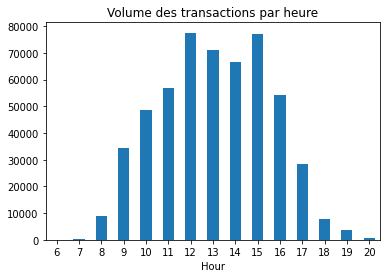

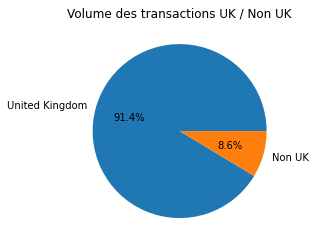

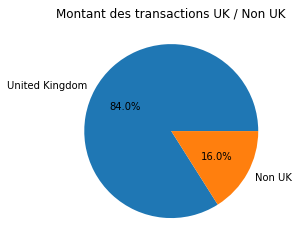

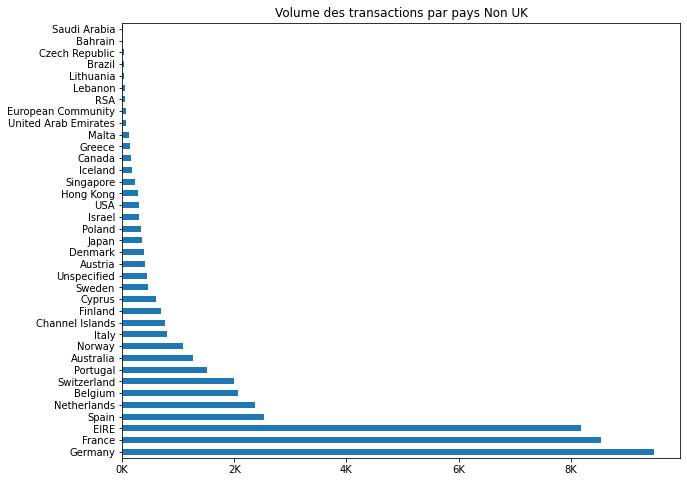

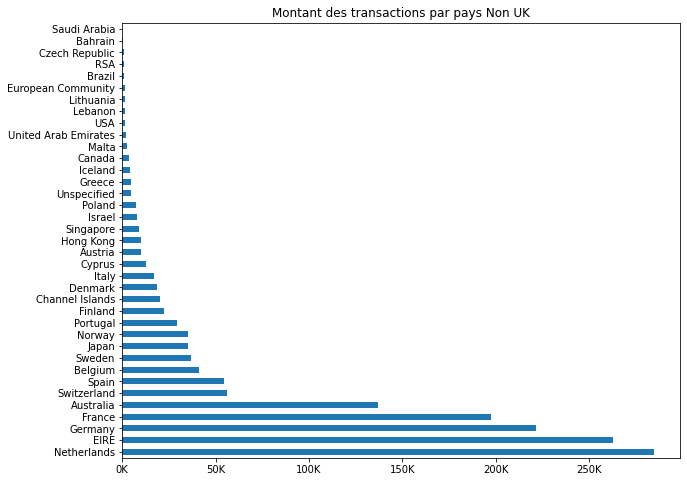

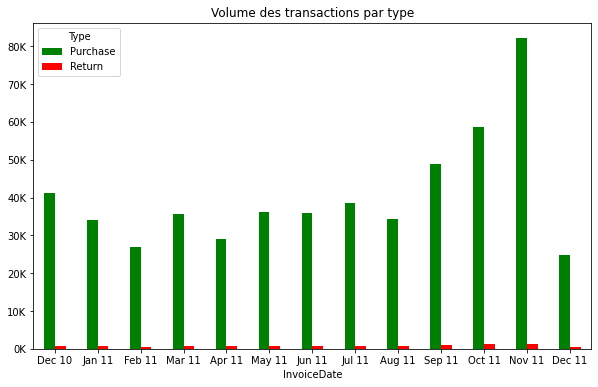

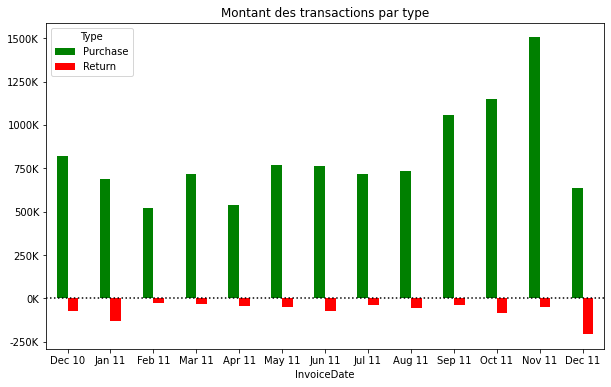

In [53]:
# %load exemples/12_plot_retail.py

# Volume des transactions par heure
fig, ax = plt.subplots()

(df_or.groupby("Hour")
 .size()
 .plot.bar(title="Volume des transactions par heure", rot=0, ax=ax)
);

# Volume des transactions UK / Non UK
fig, ax = plt.subplots()

(df_or.UK.value_counts()
 .sort_index(ascending=False)
 .plot.pie(title="Volume des transactions UK / Non UK", autopct='%.1f%%', ax=ax)
 .set_ylabel("")
);

# Montant des transactions UK / Hors UK
fig, ax = plt.subplots()

(df_or.groupby("UK")["Amount"]
 .sum()
 .sort_index(ascending=False)
 .plot.pie(title="Montant des transactions UK / Non UK", autopct='%.1f%%', ax=ax)
 .set_ylabel("")
);

# Volume des transactions par pays Non UK
fig, ax = plt.subplots(figsize=(10, 8))

(df_or.Country.value_counts()
 .drop("United Kingdom")
 .plot.barh(title="Volume des transactions par pays Non UK", ax=ax)
)

ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{int(x/1000)}K"))

# Montant des transactions par pays Non UK
fig, ax = plt.subplots(figsize=(10, 8))

(df_or.groupby("Country")["Amount"].sum()
 .drop("United Kingdom")
 .sort_values(ascending=False)
 .plot.barh(title="Montant des transactions par pays Non UK", ax=ax)
)

ax.get_xaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{int(x/1000)}K"))
ax.set_ylabel("");

# Volume des transactions par type

fig, ax = plt.subplots(figsize=(10, 6))

(df_or
 .groupby([pd.Grouper(freq='M'), 'Type']).size()
 .unstack()
 .plot.bar(title="Volume des transactions par type", color=['g', 'r'], rot=0, ax=ax)
)

ax.set_xticklabels([f"{x:%b %y}" for x in df_or.resample('M').size().index])
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{int(x/1000)}K"))

# Montant des transactions par type
fig, ax = plt.subplots(figsize=(10, 6))

(df_or
 .groupby([pd.Grouper(freq='M'), 'Type'])['Amount']
 .sum()
 .unstack()
 .plot.bar(title="Montant des transactions par type", color=['g', 'r'], rot=0, ax=ax)
)

ax.set_xticklabels([f"{x:%b %y}" for x in df_or.resample('M').size().index])
ax.axhline(y=0, color='k', ls=':')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: f"{int(x/1000)}K"))

# sparklines
(df_or.loc[lambda df_: df_.Amount>0.0]
 .groupby("Country")
 .agg(mean=("Amount", lambda s_: s_.mean().round(2)),
      trend=("Amount", lambda s_: sparkl(s_.resample('Q').mean().fillna(0))))
 .sort_values(by="mean", ascending=False)
)


## 5. Conclusion

Voir si la *Method chaining* tient ses promesses :
- Normaliser l'écriture du code avec *pandas*
- Faciliter la compréhension et la maintenance du code
- Optimiser l'utilisation de la mémoire

**Autres ateliers potentiels**

- Python et Excel : librairies pandas, xlwings, openpyxl
- Dashboarding en Python avec plotly-dash
- Autres sujets...

Animateurs ou co-animateurs bienvenus !